# Big-Mart Sales

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_csv("test_b.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [171]:
dt=pd.read_csv("train_b.csv")
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [172]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [197]:
dt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,low fat,regular
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,0.647307,0.352693
std,4.226124,0.051598,62.275067,8.371760,1706.499616,0.477836,0.477836
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,1.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,1.000000,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000,1.000000


In [173]:
#test data
df["Item_Fat_Content"]= df["Item_Fat_Content"].str.lower()

for i in range (0,len(df)):
    if df["Item_Fat_Content"][i]=="reg":
        df["Item_Fat_Content"][i]="regular"
        
    elif df["Item_Fat_Content"][i]=="lf":
        df["Item_Fat_Content"][i]="low fat"


test_fat=[]
test_fat=df["Item_Fat_Content"]
test_fat=pd.get_dummies(test_fat)
test_fat=pd.DataFrame(test_fat)

df=pd.concat([df,test_fat],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [174]:
#training data
dt["Item_Fat_Content"]= dt["Item_Fat_Content"].str.lower()

for i in range (0,len(dt)):
    if dt["Item_Fat_Content"][i]=="reg":
        dt["Item_Fat_Content"][i]="regular"
        
    elif dt["Item_Fat_Content"][i]=="lf":
        dt["Item_Fat_Content"][i]="low fat"

train_fat=[]
train_fat=dt["Item_Fat_Content"]
train_fat=pd.get_dummies(train_fat)
train_fat=pd.DataFrame(train_fat)

dt=pd.concat([dt,train_fat],axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [175]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low fat,regular
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0


[Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Dairy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Household')]

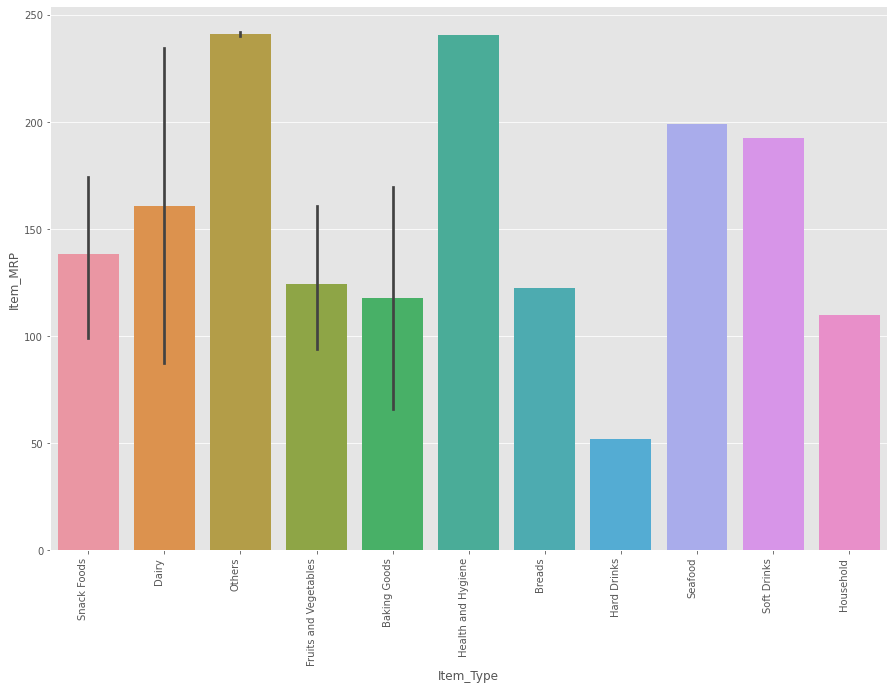

In [176]:
plt.figure(figsize=(15,10))
plot=sns.barplot(x='Item_Type',y='Item_MRP',data=df.head(22))
plot.set_xticklabels(plot.get_xticklabels(),rotation=90,horizontalalignment='right')

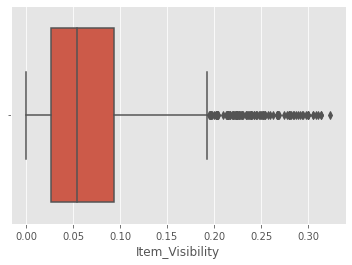

In [177]:
sns.boxplot(x='Item_Visibility',data=df)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


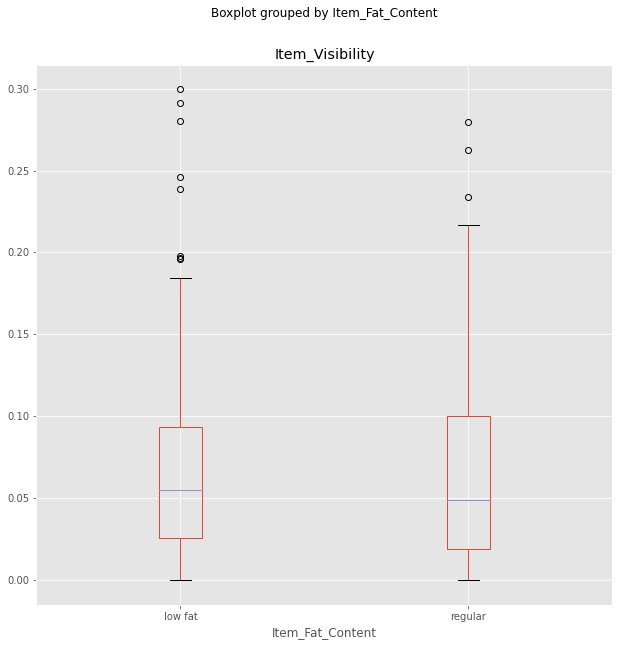

In [178]:

plt.style.use('ggplot')
df.head(500).boxplot(column='Item_Visibility',by='Item_Fat_Content',figsize=(10,10))

[Text(0, 0, 'low fat'), Text(0, 0, 'regular')]

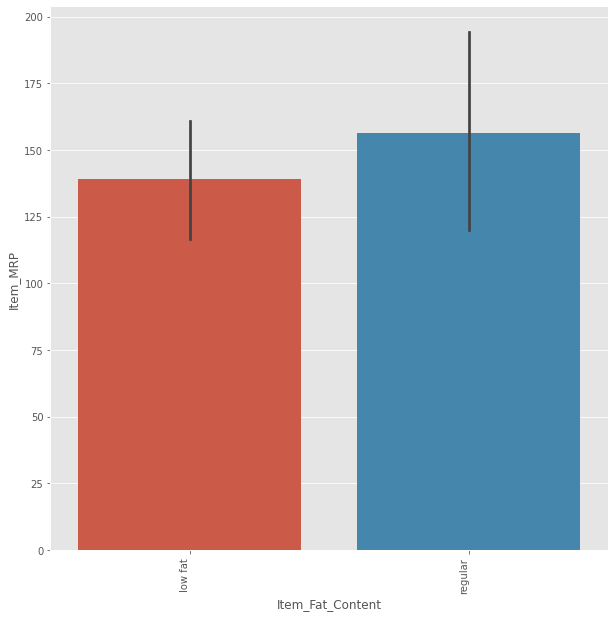

In [179]:
plt.figure(figsize=(10,10))
plot=sns.barplot(x='Item_Fat_Content',y='Item_MRP',data=df.head(40))
plot.set_xticklabels(plot.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Dairy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Breakfast')]

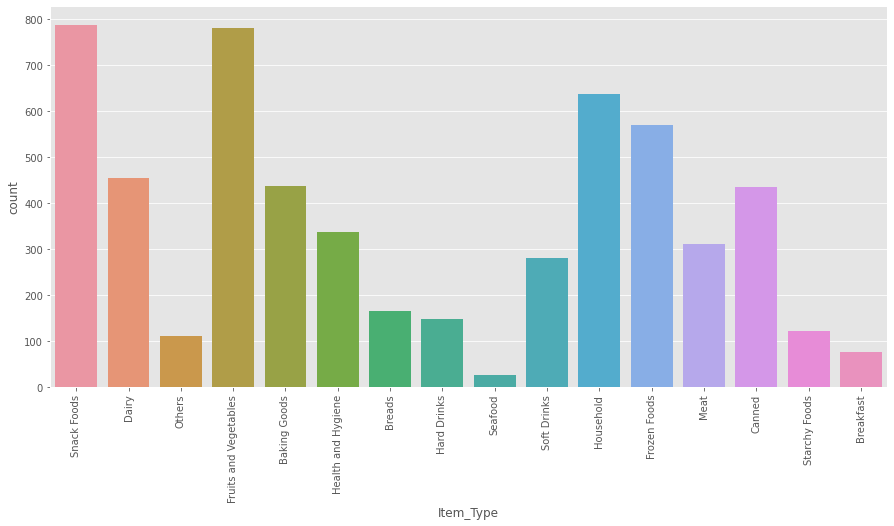

In [193]:
plt.figure(figsize=(15,7))
plot=sns.countplot(x="Item_Type",data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [181]:
#handling missing values
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
dt['Item_Weight']=dt['Item_Weight'].fillna(dt['Item_Weight'].mean())

In [182]:
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,low fat,regular
0,FDW58,20.750000,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1,0
1,FDW14,8.300000,regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,0,1
2,NCN55,14.600000,low fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1,0
3,FDQ58,7.315000,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,1,0
4,FDY38,12.695633,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0,1
5677,FDD47,7.600000,regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,1
5678,NCO17,10.000000,low fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1,0
5679,FDJ26,15.300000,regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0,1


In [183]:
data=pd.concat([dt,df],axis=0)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low fat,regular
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,0,1
5677,FDD47,7.60,regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,0,1
5678,NCO17,10.00,low fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,1,0
5679,FDJ26,15.30,regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,0,1


In [184]:
#test dataset


In [185]:
x=data.iloc[:8523,:]
y=data.iloc[8523:,:]

In [186]:
y

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low fat,regular
0,FDW58,20.750000,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,1,0
1,FDW14,8.300000,regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,0,1
2,NCN55,14.600000,low fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,1,0
3,FDQ58,7.315000,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,1,0
4,FDY38,12.695633,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,0,1
5677,FDD47,7.600000,regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,0,1
5678,NCO17,10.000000,low fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,1,0
5679,FDJ26,15.300000,regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,0,1


In [187]:
x=x.drop(["Item_Identifier","Item_Type","Item_Fat_Content","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1)

In [188]:
y=y.drop(["Item_Identifier","Item_Type","Item_Fat_Content","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"],axis=1)

In [189]:
from sklearn.model_selection import train_test_split

x_train=x.drop(["Item_Outlet_Sales"],axis=1)
y_train=x["Item_Outlet_Sales"]

In [190]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,low fat,regular
0,9.300,0.016047,249.8092,1,0
1,5.920,0.019278,48.2692,0,1
2,17.500,0.016760,141.6180,1,0
3,19.200,0.000000,182.0950,0,1
4,8.930,0.000000,53.8614,1,0
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0
8519,8.380,0.046982,108.1570,0,1
8520,10.600,0.035186,85.1224,1,0
8521,7.210,0.145221,103.1332,0,1


In [191]:
y

,Item_Weight,Item_Visibility,Item_MRP,low fat,regular
0,20.750000,0.007565,107.8622,1,0
1,8.300000,0.038428,87.3198,0,1
2,14.600000,0.099575,241.7538,1,0
3,7.315000,0.015388,155.0340,1,0
4,12.695633,0.118599,234.2300,0,1
...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,0,1
5677,7.600000,0.142991,169.1448,0,1
5678,10.000000,0.073529,118.7440,1,0
5679,15.300000,0.000000,214.6218,0,1


# Linear Regression

In [143]:
from sklearn.linear_model import LinearRegression 

In [144]:
lr=LinearRegression()

In [145]:
clf=lr.fit(x_train,y_train)

In [146]:
y_pred=clf.predict(y)
y_pred


array([1877.63510931, 1520.82321204, 3575.88042141, ..., 1781.16112259,
       3653.71160311, 1119.4264949 ])

In [147]:
clf.score(x_train,y_train)

0.3389625432952913

In [ ]:
pred=pd.DataFrame(y_pred)
sub=pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub["Item_Identifier"],sub["Outlet_Identifier"],pred],axis=1)
datasets.columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]
datasets.to_csv("sub.csv")

# Decision tree

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
d_tree=DecisionTreeRegressor()

In [150]:
d_clf=d_tree.fit(x_train,y_train)

In [151]:
t_pred=d_clf.predict(y)
t_pred

array([1693.7952,  959.4178,  245.6802, ..., 1797.66  , 4274.436 ,
       2157.192 ])

In [ ]:
pred=pd.DataFrame(t_pred)
sub=pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub["Item_Identifier"],sub["Outlet_Identifier"],pred],axis=1)
datasets.columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]
datasets.to_csv("sub.csv")

In [152]:
d_clf.score(x_train,y_train)

1.0

# RamdomForest

In [153]:
from sklearn.ensemble import RandomForestRegressor

rc=RandomForestRegressor()
rc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [154]:
r_pred=rc.predict(y)

In [155]:
pred=pd.DataFrame(r_pred)
sub=pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub["Item_Identifier"],sub["Outlet_Identifier"],pred],axis=1)
datasets.columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]
datasets.to_csv("sub.csv")

In [156]:
rc.score(x_train,y_train)

0.8977283643913068

# xgboost

In [ ]:
pip install xgboost==1.4.2

     |████████████████████████████████| 166.7MB 70kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [157]:
import xgboost as xgb
xgb=xgb.XGBRegressor(objective='reg:squarederror',
                     colsample_bytree=0.5,
                     learning_rate=0.1,
                     alpha=10,max_depth=5,
                     n_estimators=10,
                     base_score=0.35,
                     booster='gbtree',
                     random_state=0,reg_alpha=0, reg_lambda=1,
                     )

In [158]:
x_clf=xgb.fit(x_train,y_train)

In [159]:
x_pred=x_clf.predict(y)

In [160]:
x_pred

array([1159.4939, 1038.1373, 1931.9937, ..., 1261.8589, 1760.1442,
       1102.6338], dtype=float32)

In [161]:
x_clf.score(x_train,y_train)

0.01743661204745417

#Lightgbm

In [162]:
import lightgbm as lgb 

In [163]:
param={
          'objective':'regression',
          'learning_rate':0.03,
          'boosting_type':'gbdt',
          'metric':['12','auc'],
          'feature_fraction':0.6,
          'bagging_fraction':0.6,
          'bagging_freq':10,
          'verbose':0,
          'max_depth':10,
          'num_leaves':128,
          'max_bin':512,
          'num_iterations':100000,
          'n_estimators':1000
}

In [164]:
lgbm=lgb.LGBMRegressor(**param)

In [165]:
l_clf=lgbm.fit(x_train,y_train)
l_pred=l_clf.predict(y)
l_pred

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


array([ 868.25794183, 1460.48844484, 2861.59691965, ..., 1868.06500028,
       2829.64670947, 2106.49337252])

In [167]:
l_clf.score(x_train,y_train)

0.9713849649311074

In [ ]:
pred=pd.DataFrame(l_pred)
sub=pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub["Item_Identifier"],sub["Outlet_Identifier"],pred],axis=1)
datasets.columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]
datasets.to_csv("sub.csv")